In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("telco_churn_sample.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,C000001,Male,0,No,No,37,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Electronic check,44.00,1585.75,No
1,C000002,Female,1,Yes,No,10,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,48.41,461.16,No
2,C000003,Female,0,Yes,No,12,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Credit card (automatic),22.55,294.87,No
3,C000004,Female,0,Yes,No,49,No,No phone service,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),75.55,3733.79,No
4,C000005,Female,0,Yes,No,55,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,69.78,3812.72,No


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1200 non-null   object 
 1   gender            1200 non-null   object 
 2   SeniorCitizen     1200 non-null   int64  
 3   Partner           1200 non-null   object 
 4   Dependents        1200 non-null   object 
 5   tenure            1200 non-null   int64  
 6   PhoneService      1200 non-null   object 
 7   MultipleLines     1200 non-null   object 
 8   InternetService   1200 non-null   object 
 9   OnlineSecurity    1191 non-null   object 
 10  OnlineBackup      1200 non-null   object 
 11  DeviceProtection  1200 non-null   object 
 12  TechSupport       1200 non-null   object 
 13  StreamingTV       1200 non-null   object 
 14  StreamingMovies   1200 non-null   object 
 15  Contract          1200 non-null   object 
 16  PaperlessBilling  1200 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,1200.000000,1200.00000,1191.000000,1176.000000
mean,0.133333,36.23500,57.046919,2119.984923
std,0.340076,21.10484,17.690566,1410.441165
min,0.000000,0.00000,18.000000,-14.090000
25%,0.000000,18.00000,44.225000,1003.967500
50%,0.000000,37.00000,56.780000,1859.210000
75%,0.000000,54.00000,69.960000,3087.370000
max,1.000000,72.00000,110.500000,6610.680000


In [4]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       9
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        9
MonthlyCharges       9
TotalCharges        24
Churn                0
dtype: int64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [6]:
for col in df.select_dtypes(include='object'):
    df[col] = df[col].fillna('Unknown')

In [7]:
df = df.drop_duplicates()

In [8]:
bins = [-1, 0, 12, 24, 48, 72, 200]
labels = ['0','1-12','13-24','25-48','49-72','73+']
df['tenure_group'] = pd.cut(df['tenure'], bins=bins, labels=labels)

In [11]:
# Churn by Contract
contract_summary = df.groupby('Contract').agg(
    total_customers=('customerID','count'),
    churners=('Churn', lambda x: (x=='Yes').sum())
)
contract_summary['churn_rate'] = contract_summary['churners'] / contract_summary['total_customers']

In [12]:
customer_summary = df.groupby('customerID').agg(
    TotalCharges=('TotalCharges','sum'),
    MonthlyCharges=('MonthlyCharges','mean'),
    tenure=('tenure','max'),
    churned=('Churn', lambda x: (x=='Yes').any())
)

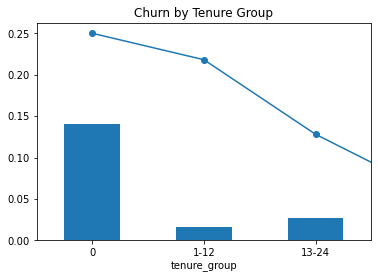

In [13]:
# Churn by Contract
contract_summary['churn_rate'].plot(kind='bar', title='Churn by Contract')

# Churn by tenure group
tenure_summary = df.groupby('tenure_group').agg(
    churn_rate=('Churn', lambda x: (x=='Yes').mean())
)
tenure_summary['churn_rate'].plot(marker='o', title='Churn by Tenure Group')
plt.show()

In [14]:
df.to_csv("telco_churn_clean.csv", index=False)
